# **Loan Approval Prediction**

## Problem Statement 
Loan approval prediction poses a unique challenge due to the multifaceted nature of the factors that influence an applicant’s ability to repay a loan. Traditionally, loan officers have relied on a set of criteria—such as credit score, income level, age, and past loan repayment history—when determining the risk associated with lending money to an individual. However, this process often lacks objectivity and is subject to human bias, where subjective interpretations of the data can lead to unfair or inconsistent decisions. Additionally, the sheer volume of loan applications in large financial institutions makes it increasingly difficult for human evaluators to maintain accuracy and efficiency.

## Business Objective
The primary problem to address in this case study is the creation of an automated predictive model capable of accurately forecasting whether a given loan application will be approved or rejected. The model should take into account a variety of features that can significantly affect the loan decision, including:<br>

● Demographic factors: Age, marital status, education level, and employment status, which often influence an applicant's financial stability and future earning potential.<br>
● Credit-related factors: Credit score, outstanding debts, and the applicant’s credit history, which are indicative of how reliable an individual has been in repaying previous debts.<br>
● Financial factors: Monthly income, loan amount, loan term, and debt-to-income ratio, which provide insight into an applicant’s ability to manage additional financial commitments.<br>
● Behavioral and socio-economic factors: Housing situation, type of employment, and other lifestyle-related information that can impact the applicant’s long-term financial behavior.

## Model Building Workflow
1. Reading and Understanding the Data
2. Data Cleaning and Preparations
3. Train Test Split (80-20)
4. EDA on Training Data
6. Feature Engineering
7. Model Building
8. Model Evaluation

## **1. Reading and Understanding the Data**

In [97]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
# Load the dataset
loan_data = pd.read_csv('loan_approval_dataset.csv')

In [99]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [100]:
# Inspect the shape of the dataset
loan_data.shape

(4269, 13)

In [101]:
# Inspect the features in the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [102]:
# Check the number of missing values in each column
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## **2. Data Cleaning and Preparation**

In [103]:
print(loan_data.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [104]:
# Drop the ID column (do NOT use it as a feature)
loan_data_copy = loan_data.drop(columns=["loan_id"])

In [105]:
# Removing extra white spaces in column names
loan_data_copy.columns = loan_data_copy.columns.str.strip()
print(loan_data_copy.columns.tolist())

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [106]:
# Check what the target values look like
print(loan_data_copy["loan_status"].value_counts(dropna=False))

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [108]:
print(loan_data_copy["education"].unique())
print(loan_data_copy["self_employed"].unique())

[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [109]:
# Clean whitespace
loan_data_copy["education"] = loan_data_copy["education"].astype(str).str.strip()
loan_data_copy["self_employed"] = loan_data_copy["self_employed"].astype(str).str.strip()

In [111]:
# See all unique raw labels (including weird spacing/case)
print(loan_data_copy["loan_status"].astype(str).unique())
print("\nValue counts (raw):")
print(loan_data_copy["loan_status"].value_counts(dropna=False))

[' Approved' ' Rejected']

Value counts (raw):
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [112]:
# Clean whitespace
loan_data_copy["loan_status"] = loan_data_copy["loan_status"].astype(str).str.strip()

## **3. Train Test Split**

In [114]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = loan_data_copy.drop(columns=["loan_status"])
y = loan_data_copy["loan_status"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(normalize=True))
print("\nShapes:", X_train.shape, X_test.shape)

Train class distribution:
 loan_status
Approved    0.622255
Rejected    0.377745
Name: proportion, dtype: float64

Test class distribution:
 loan_status
Approved    0.62178
Rejected    0.37822
Name: proportion, dtype: float64

Shapes: (3415, 11) (854, 11)


## **4. EDA on Training Data**

In [115]:
# Identify column types from training data
num_cols = X_train.select_dtypes(include="number").columns
cat_cols = X_train.select_dtypes(include="object").columns

print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical columns: ['education', 'self_employed']


loan_status
Approved    2125
Rejected    1290
Name: count, dtype: int64

Approval rate: 0.6222547584187409


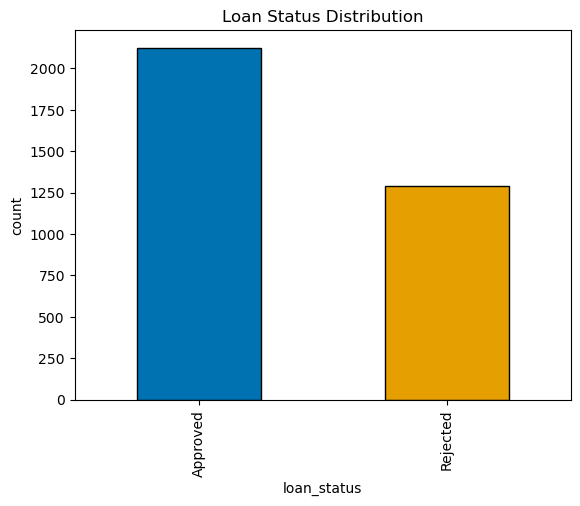

In [119]:
colors = {"Approved": "#0072B2", "Rejected": "#E69F00"} 
counts = y_train.value_counts(dropna=False)
display(counts)
print("Approval rate:", (y_train == "Approved").mean())

plt.figure()
counts.plot(kind="bar", color=[colors[i] for i in counts.index], edgecolor="black")
plt.title("Loan Status Distribution")
plt.xlabel("loan_status")
plt.ylabel("count")
plt.show()

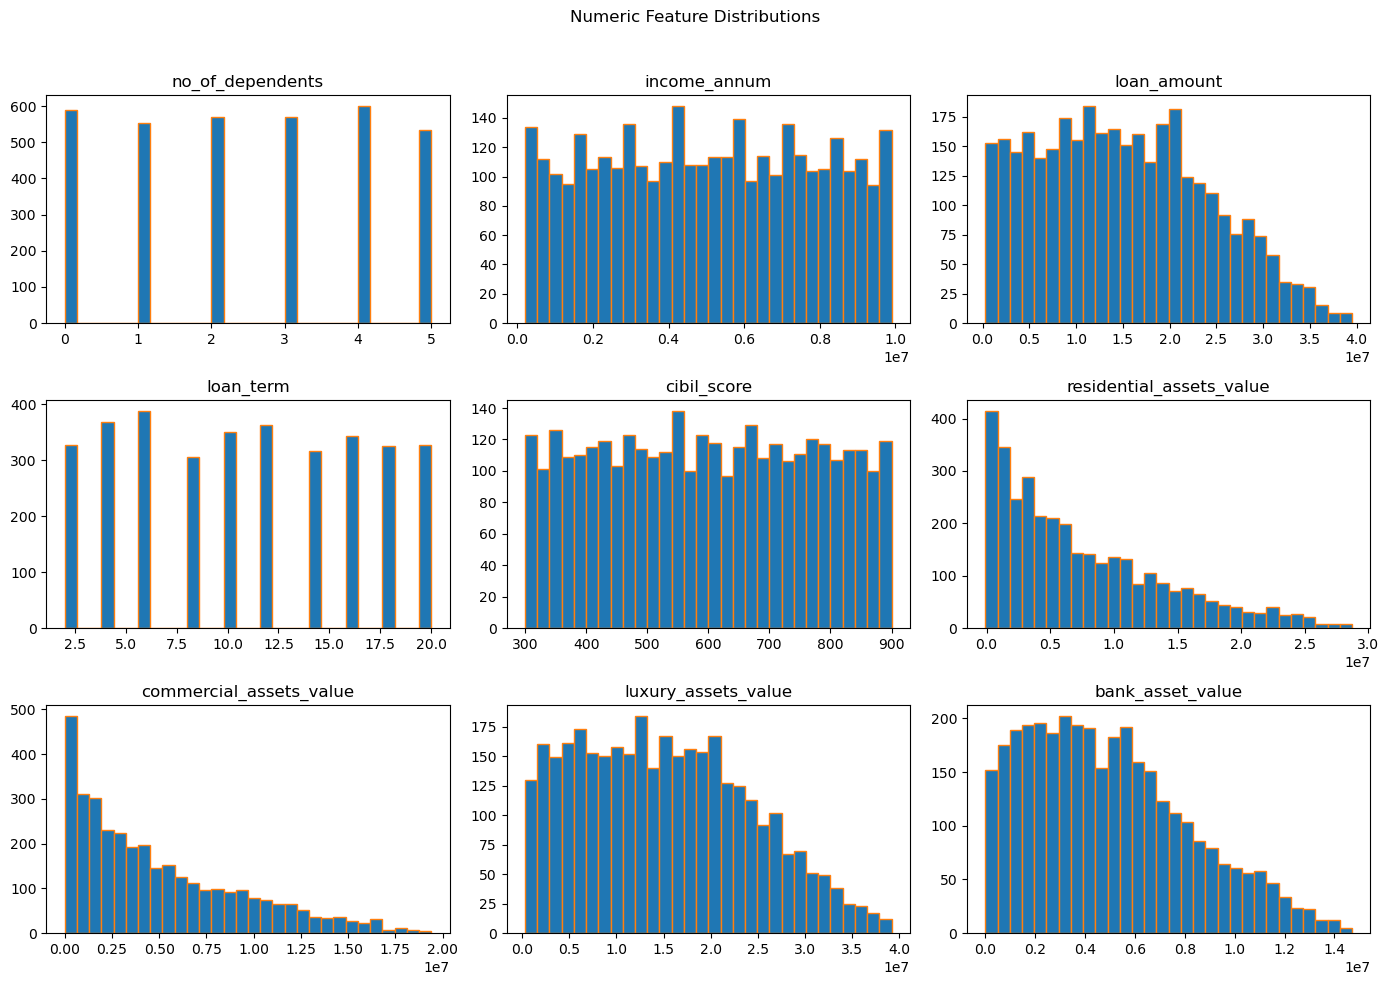

In [123]:
axes = X_train[num_cols].hist(
    bins=30, figsize=(14,10),
    color="#1f77b4", edgecolor="#ff7f0e", linewidth=1.0
)

for ax in axes.ravel():
    ax.grid(False)

plt.suptitle("Numeric Feature Distributions")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [124]:
display(X_train[num_cols].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]).T)

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
no_of_dependents,3415.0,2.480234e+00,1.702579e+00,0.0,0.0,0.0,1.0,2.0,4.0,5.0,5.0,5.0
income_annum,3415.0,5.040410e+06,2.798597e+06,200000.0,300000.0,600000.0,2600000.0,5000000.0,7500000.0,9400000.0,9800000.0,9900000.0
loan_amount,3415.0,1.505145e+07,8.997539e+06,300000.0,700000.0,1800000.0,7700000.0,14400000.0,21400000.0,30730000.0,35500000.0,39500000.0
loan_term,3415.0,1.086149e+01,5.715719e+00,2.0,2.0,2.0,6.0,10.0,16.0,20.0,20.0,20.0
cibil_score,3415.0,5.982152e+02,1.726735e+02,300.0,304.0,330.0,451.0,596.0,747.0,868.0,894.0,900.0
residential_assets_value,3415.0,7.416574e+06,6.446053e+06,-100000.0,0.0,300000.0,2200000.0,5600000.0,11200000.0,20830000.0,25400000.0,28700000.0
commercial_assets_value,3415.0,4.958799e+06,4.345481e+06,0.0,0.0,200000.0,1400000.0,3700000.0,7600000.0,13800000.0,16700000.0,19400000.0
luxury_assets_value,3415.0,1.510182e+07,9.102226e+06,300000.0,614000.0,1900000.0,7400000.0,14500000.0,21700000.0,31200000.0,36186000.0,39200000.0
bank_asset_value,3415.0,4.946764e+06,3.237725e+06,0.0,200000.0,500000.0,2300000.0,4500000.0,7100000.0,11100000.0,13100000.0,14700000.0


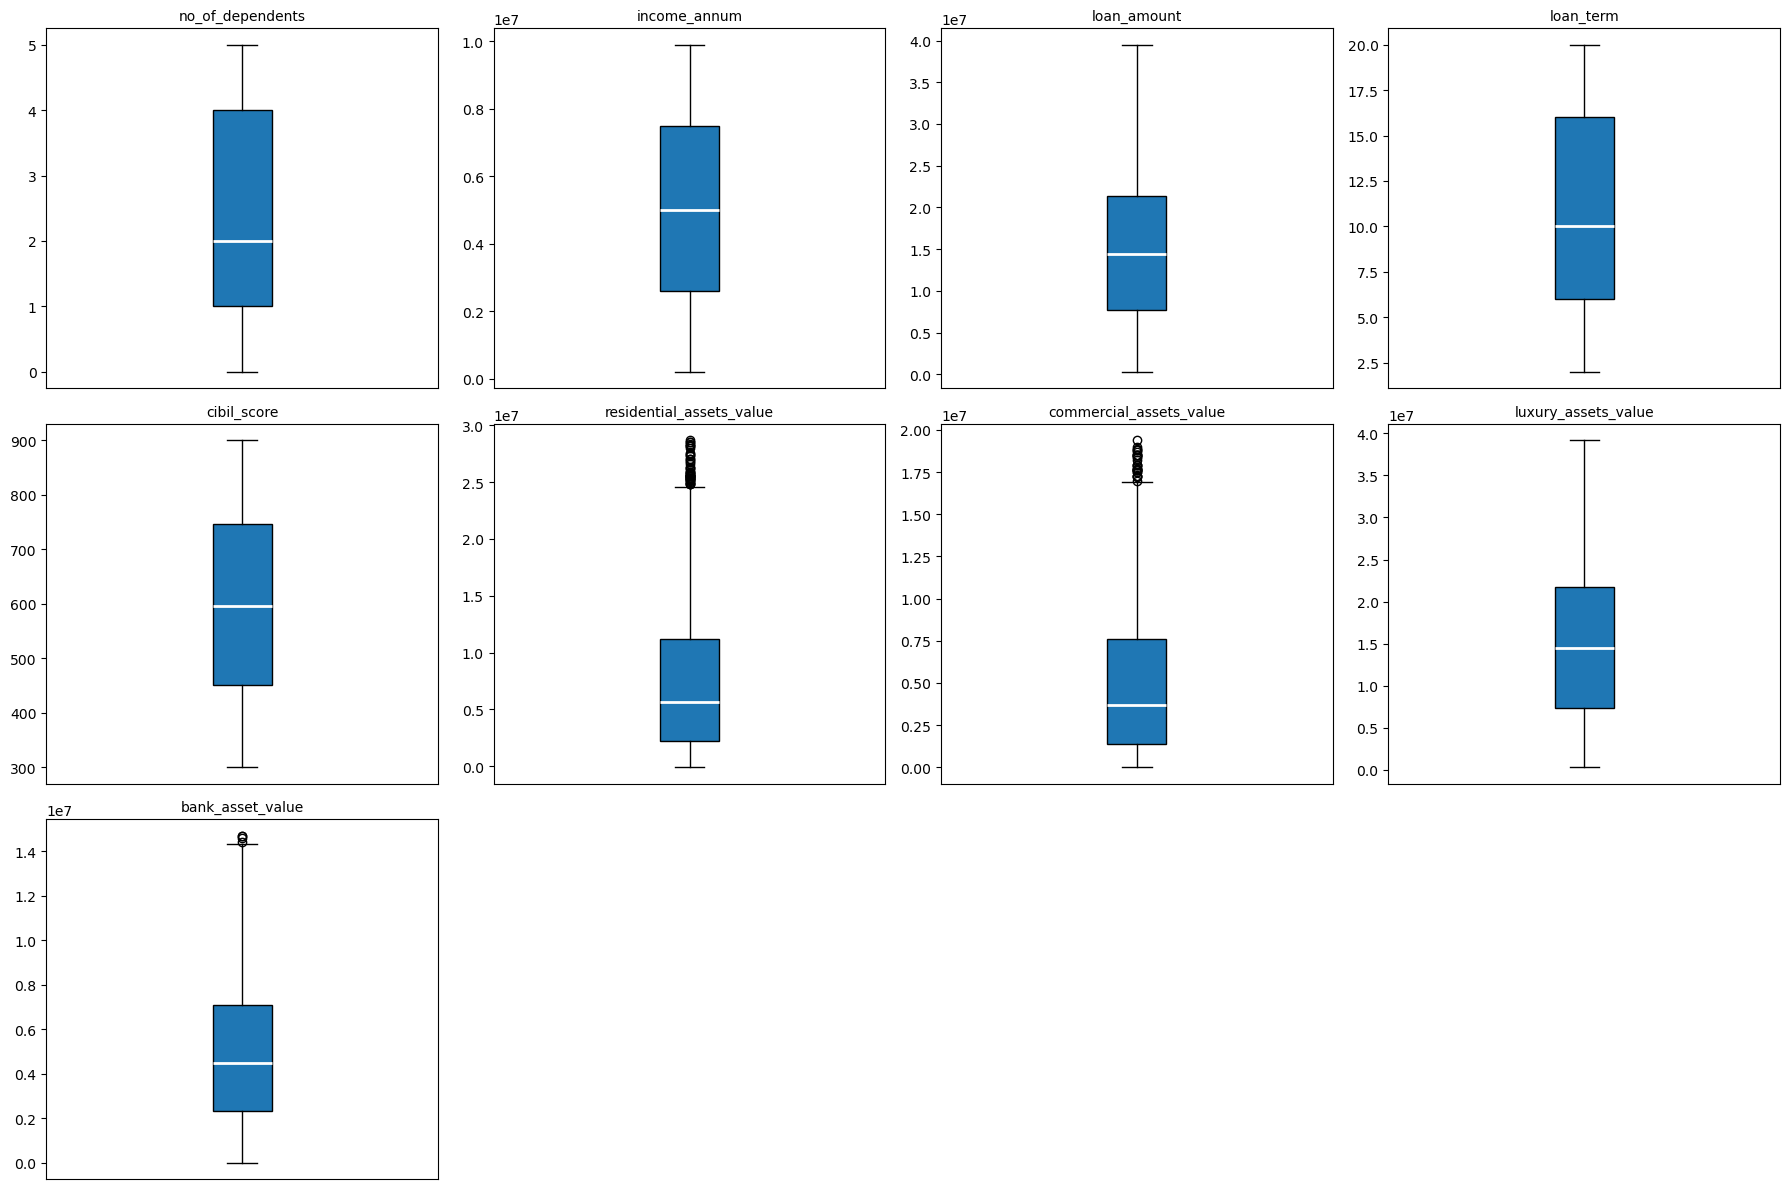

In [145]:
data = X_train[num_cols]
n = data.shape[1]

ncols = 4
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12))
axes = axes.flatten()

blue = "#0072B2"

for i, col in enumerate(data.columns):
    ax = axes[i]
    ax.boxplot(
        data[col].dropna(),
        medianprops=dict(color="w", linewidth=2.0),
        patch_artist=True
    )
    ax.set_title(col, fontsize=10)
    ax.grid(False)
    ax.set_xticks([])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

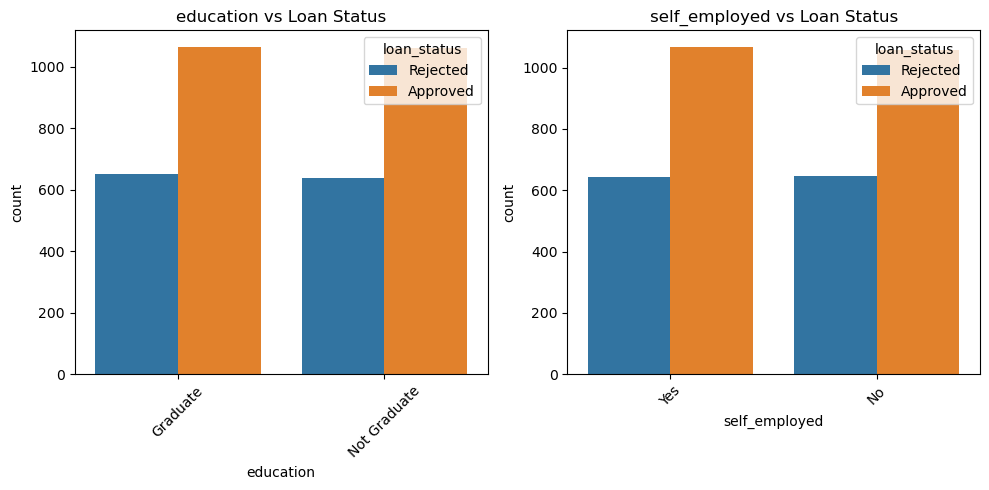

In [130]:
plt.figure(figsize=(10, 5))
for idx, col in enumerate(cat_cols):
    plt.subplot(1, 2, idx + 1)
    sns.countplot(data=X_train, x=col, hue=y_train)
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

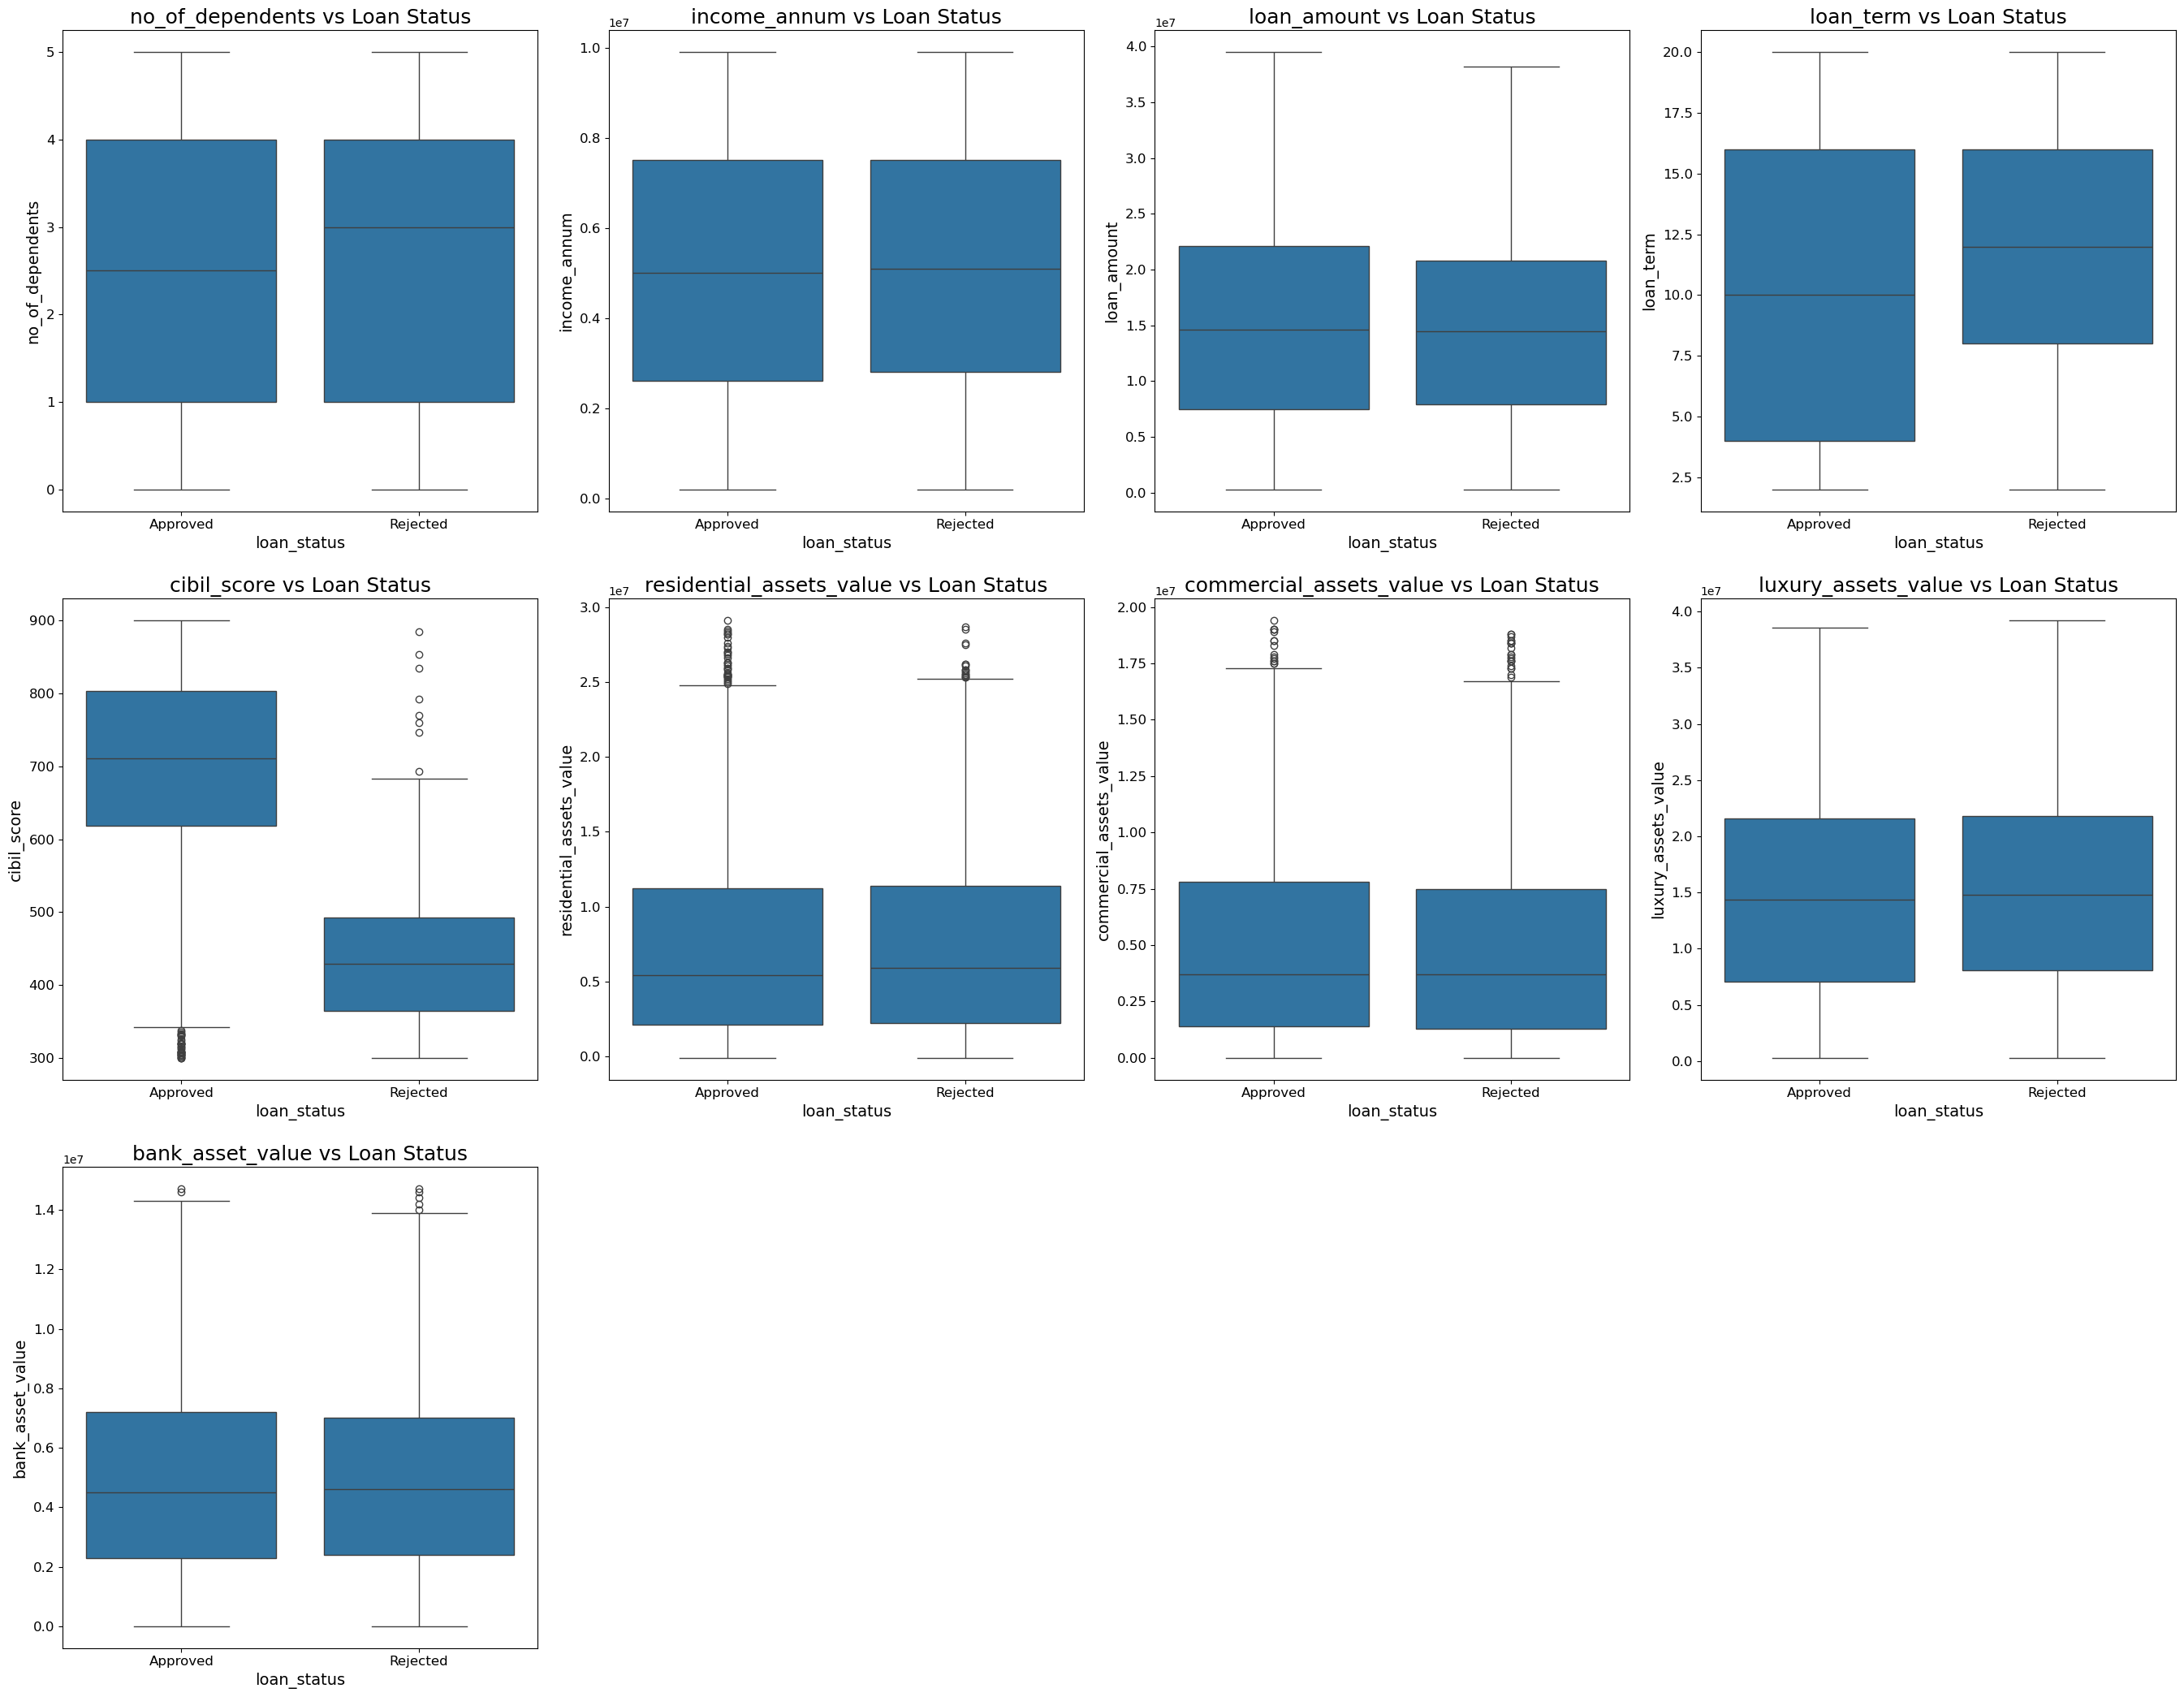

In [138]:
title_fs = 18
label_fs = 14
tick_fs  = 12

n_cols = 4
n_rows = -(-len(num_cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(27, n_rows * 7))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.boxplot(x='loan_status', y=col, data=loan_data_copy, ax=axes[idx])
    
    axes[idx].set_title(f'{col} vs Loan Status', fontsize=title_fs)
    axes[idx].set_xlabel('loan_status', fontsize=label_fs)
    axes[idx].set_ylabel(col, fontsize=label_fs)
    axes[idx].tick_params(axis='both', labelsize=tick_fs)

# Turn off unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

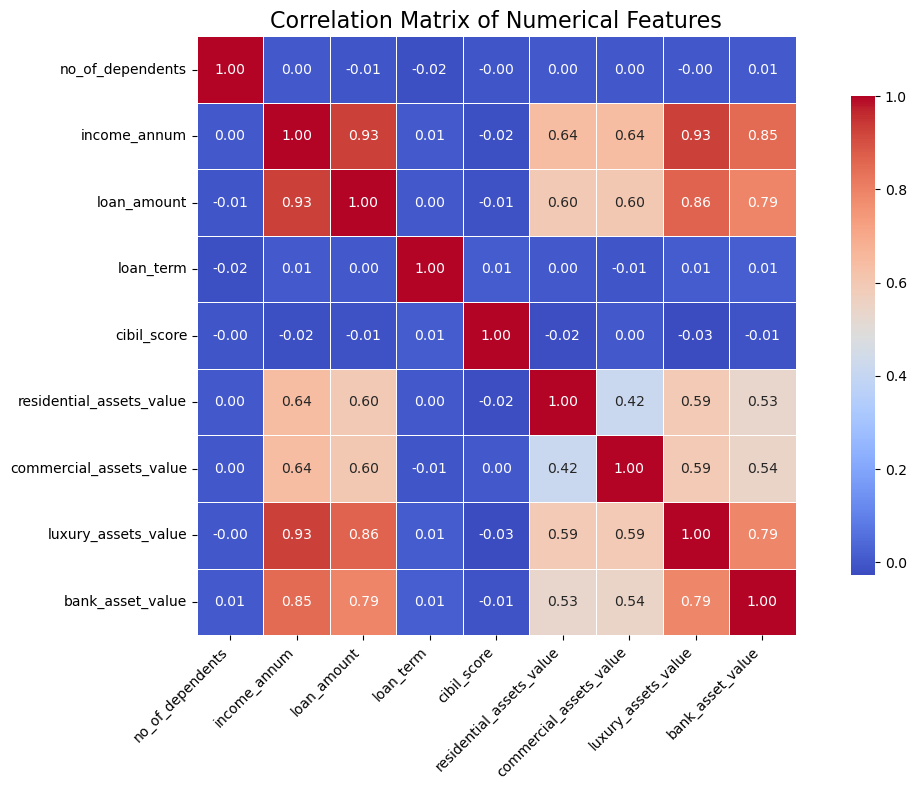

In [131]:
# Create correlation matrix for numerical columns
corr_mat = X_train[num_cols].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))  # Larger plot size
sns.heatmap(corr_mat, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **5. Feature Engineering**

In [152]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1224,0,Graduate,Yes,9800000,23900000,14,459,1000000,13400000,21100000,7200000
478,3,Not Graduate,Yes,3600000,8600000,8,790,5400000,5900000,9800000,5200000
3065,2,Not Graduate,No,2000000,4000000,14,502,4900000,1500000,5400000,1300000
326,2,Not Graduate,Yes,3900000,11300000,12,516,3100000,0,10400000,4600000
2991,3,Not Graduate,No,2300000,8500000,12,557,3600000,1400000,6200000,1300000


In [153]:
y_train.head()

1224    Rejected
478     Approved
3065    Rejected
326     Rejected
2991    Approved
Name: loan_status, dtype: object

In [151]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [154]:
scaler = StandardScaler()

# Scale the numeric features present in the training data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Scale the numeric features present in the test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [157]:
# Map to numbers
X_train["education"] = X_train["education"].map({"Graduate": 1, "Not Graduate": 0})
X_train["self_employed"] = X_train["self_employed"].map({"Yes": 1, "No": 0})

In [158]:
# Map to numbers
X_test["education"] = X_test["education"].map({"Graduate": 1, "Not Graduate": 0})
X_test["self_employed"] = X_test["self_employed"].map({"Yes": 1, "No": 0})

In [159]:
y_train = y_train.map({"Approved": 1, "Rejected": 0})
y_test = y_test.map({"Approved": 1, "Rejected": 0})

In [160]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1224,-1.456965,1,1,1.700955,0.983585,0.549181,-0.806352,-0.995573,1.942808,0.659076,0.696034
478,0.305326,0,1,-0.514765,-0.717129,-0.500709,1.110842,-0.312884,0.216625,-0.582560,0.078226
3065,-0.282104,0,0,-1.086564,-1.228455,0.549181,-0.557291,-0.390463,-0.796070,-1.066029,-1.126500
326,-0.282104,0,1,-0.407553,-0.417003,0.199218,-0.476201,-0.669744,-1.141306,-0.516632,-0.107117
2991,0.305326,0,0,-0.979352,-0.728245,0.199218,-0.238724,-0.592166,-0.819085,-0.978125,-1.126500


In [161]:
y_train.head()

1224    0
478     1
3065    0
326     0
2991    1
Name: loan_status, dtype: int64

## **6. Model Building**

In [162]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [163]:
# Train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#RUN AFTERWARDS

# Predict the probabilities on the training set
#y_train_pred = lr.predict(X_train)

In [164]:
# Predictions (class 0/1)
y_pred = lr.predict(X_test)

In [165]:
# Prediction probabilities (needed for ROC-AUC)
y_prob = lr.predict_proba(X_test)[:, 1]

## **7. Model Evaluation**

In [166]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [167]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[283  40]
 [ 25 506]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       323
           1       0.93      0.95      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854


ROC-AUC: 0.9744975599517237


In [168]:
from sklearn import metrics

In [169]:
# Import libraries or function to plot the ROC curve
from sklearn.metrics import roc_curve

# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

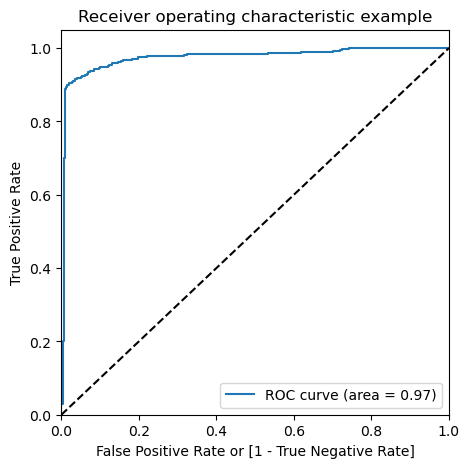

In [170]:
# Call the ROC function
draw_roc(y_test, y_prob)

## Logistic Regression Model Performance — Conclusion (Test Set)

The Logistic Regression model demonstrates **strong predictive performance** on the test set, achieving an **overall accuracy of 0.92**, meaning it correctly classifies loan approval status for most applicants.

---

### Confusion Matrix Interpretation

| Outcome | Count | Meaning |
|---|---:|---|
| **True Negatives (TN)** | **283** | Rejected loans correctly predicted as *Rejected* |
| **False Positives (FP)** | **40** | Rejected loans incorrectly predicted as *Approved* |
| **False Negatives (FN)** | **25** | Approved loans incorrectly predicted as *Rejected* |
| **True Positives (TP)** | **506** | Approved loans correctly predicted as *Approved* |

**Key observation:** The model produces **slightly more false approvals (40)** than false rejections (25), which may be important depending on the business risk tolerance.

---

### Classification Report Summary

#### Class 0 — Rejected
- **Precision: 0.92** → When the model predicts *Rejected*, it is correct **92%** of the time.  
- **Recall: 0.88** → The model correctly identifies **88%** of all actual rejections.  
- **F1-score: 0.90** → Good balance between precision and recall for rejection detection.

#### Class 1 — Approved
- **Precision: 0.93** → When the model predicts *Approved*, it is correct **93%** of the time.  
- **Recall: 0.95** → The model correctly identifies **95%** of all actual approvals (very strong).  
- **F1-score: 0.94** → Excellent performance for approval prediction.

**Overall performance consistency:**
- **Macro Avg F1-score: 0.92** → Balanced performance across both classes.
- **Weighted Avg F1-score: 0.92** → Stable performance despite class distribution differences.

---

### ROC–AUC Score

The model achieves a **ROC–AUC of 0.975**, indicating **excellent separability** between approved and rejected classes across different classification thresholds.

---

### Overall Conclusion

Overall, the Logistic Regression model performs **very well** with high accuracy, strong F1-scores for both classes, and an excellent ROC–AUC value. It is particularly strong at predicting **Approved loans**, while still maintaining solid performance on **Rejected loans**. This makes it a reliable baseline model, and performance could potentially be further improved using feature engineering, hyperparameter tuning (regularization), or more advanced classifiers.